# Códigos de señales 

Importamos librerias

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

## Señal ECG


### Reposo basal

In [122]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EKG/reposo1.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

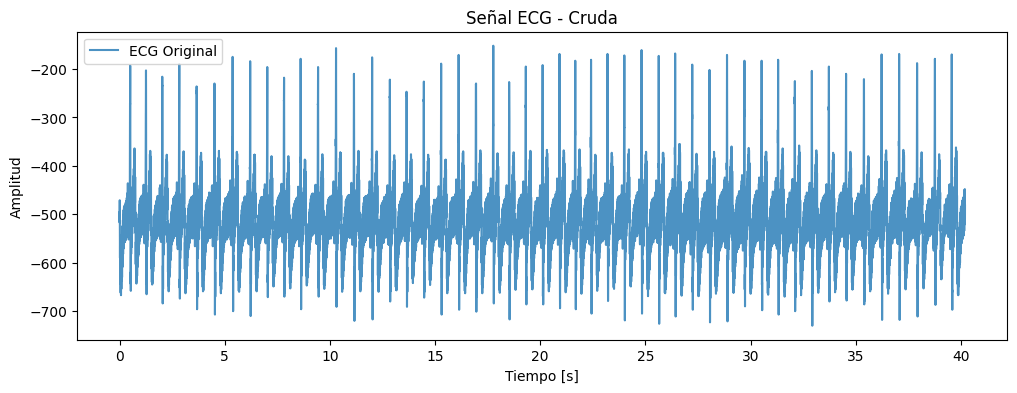

In [123]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="ECG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Cruda")
plt.legend()
plt.show()


Umbral Universal calculado: 5.1393


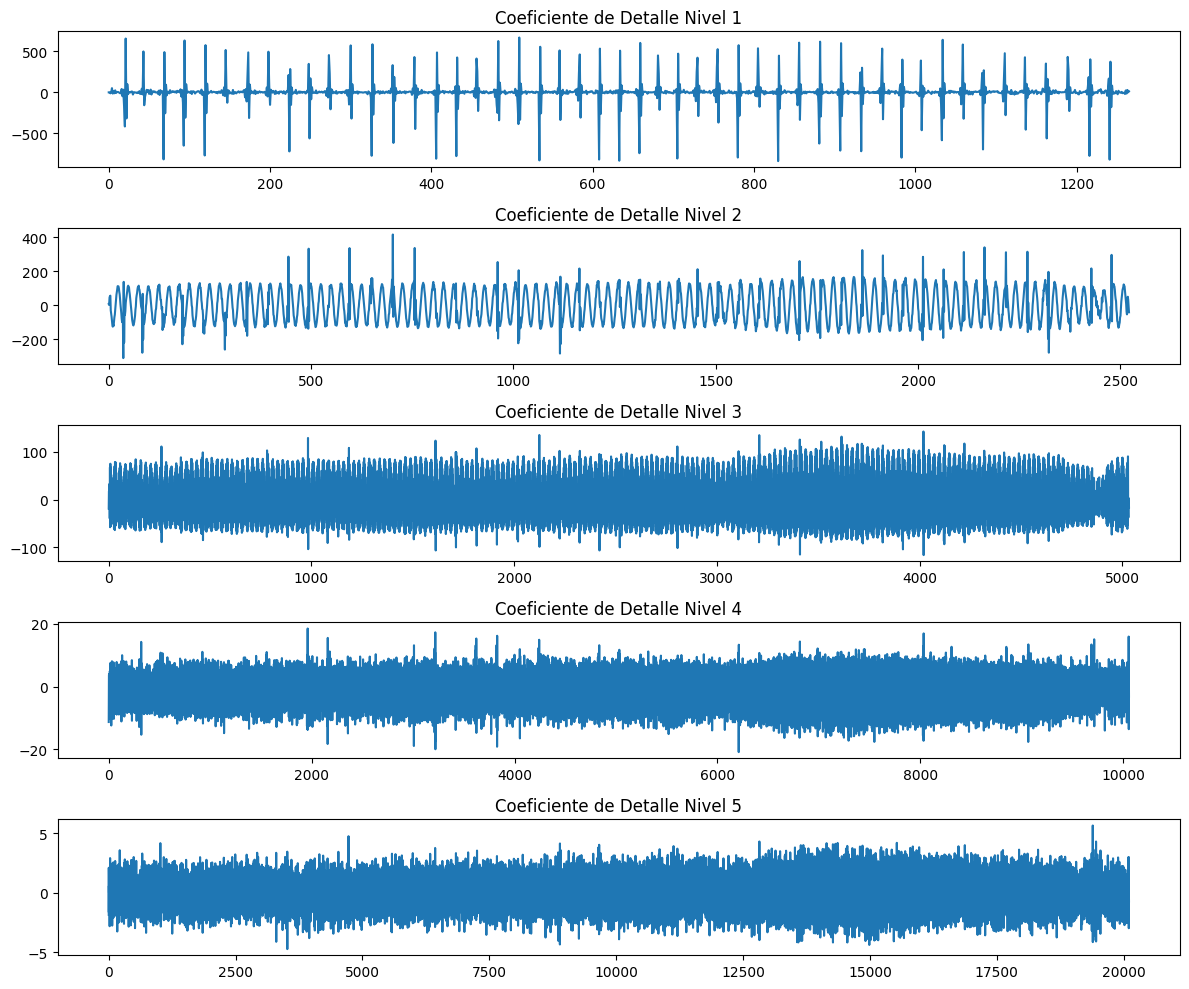

In [124]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

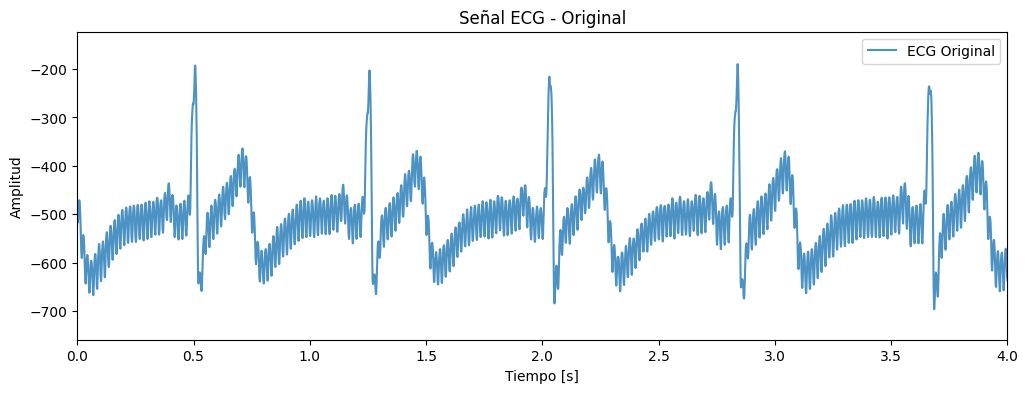

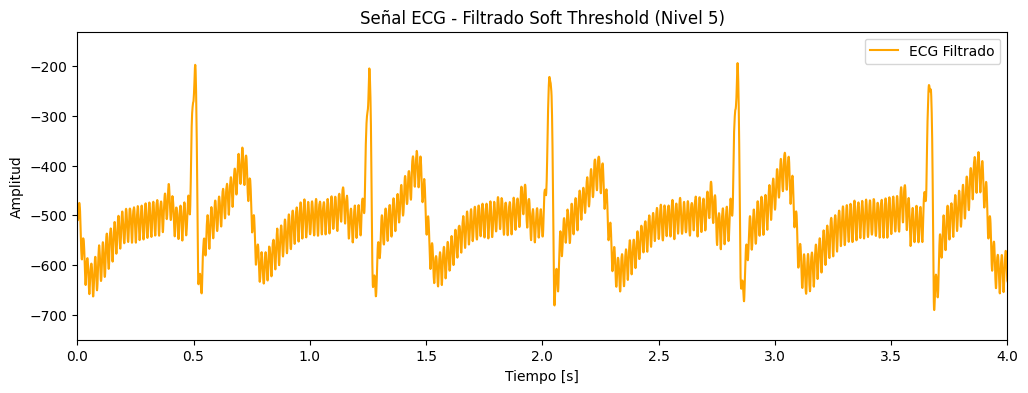

In [125]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="ECG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="ECG Filtrado", color="orange")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal ECG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

### Apnea 10 segundos

In [126]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EKG/apnea_10seg_toma1.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

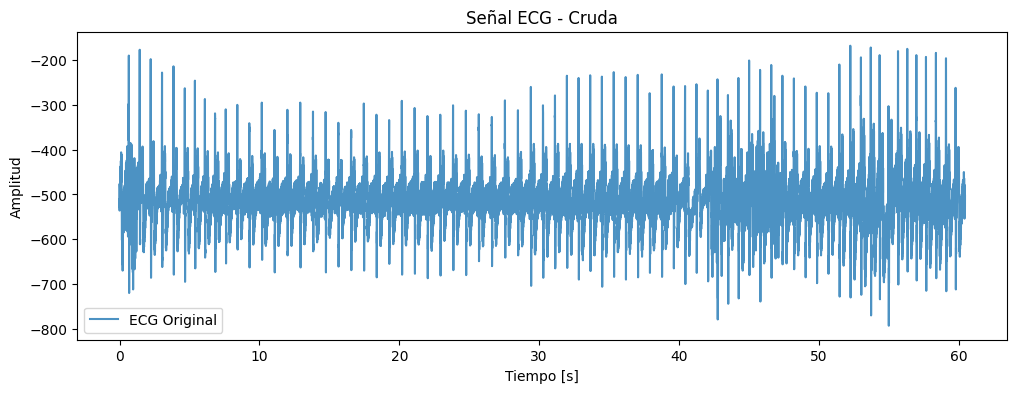

In [127]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="ECG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 5.3815


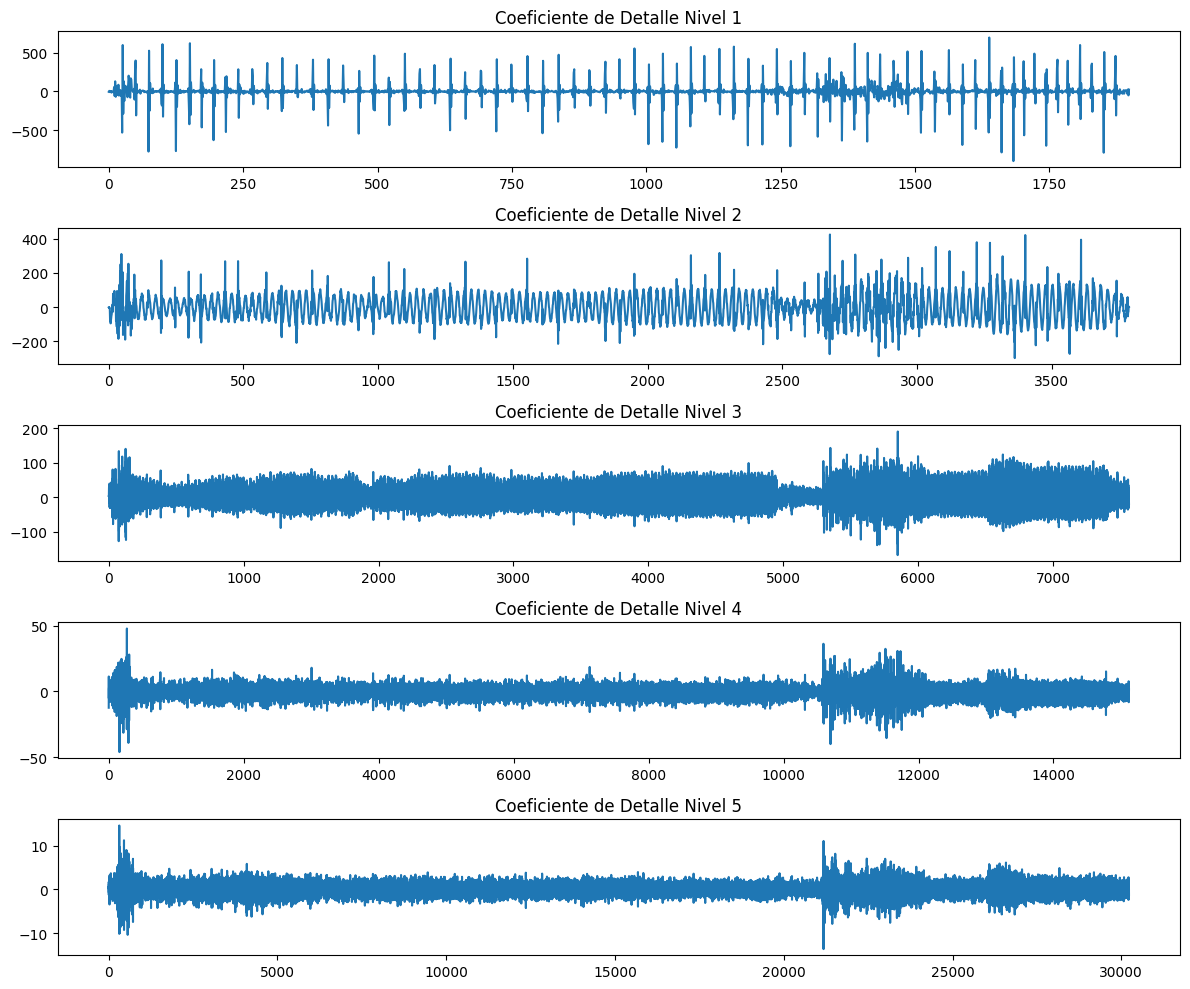

In [128]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

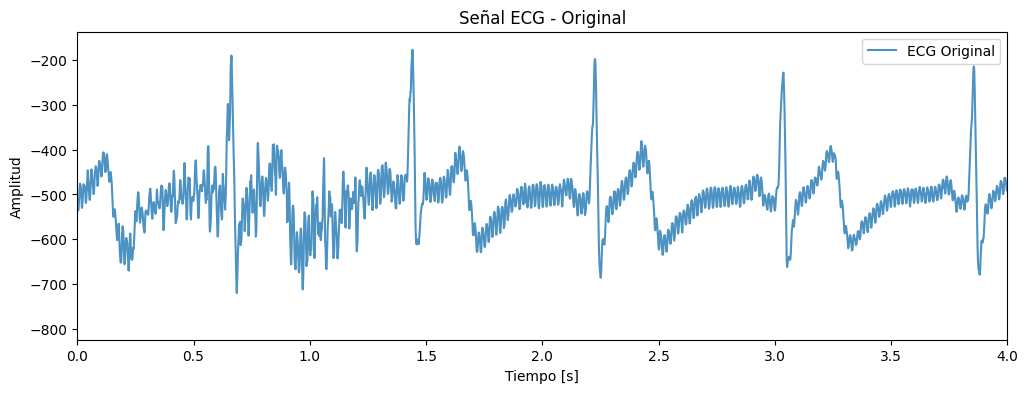

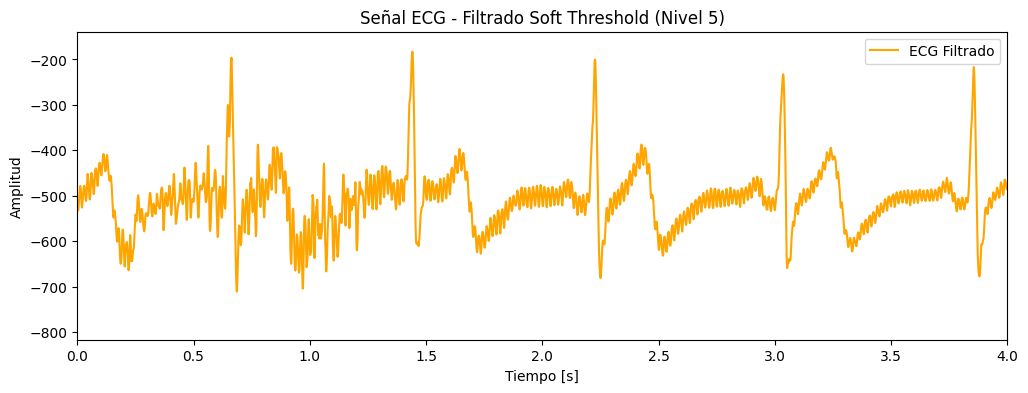

In [129]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="ECG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="ECG Filtrado", color="orange")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal ECG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

### Posterior a actividad aerobica

In [130]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EKG/actividad_aerobica_1.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

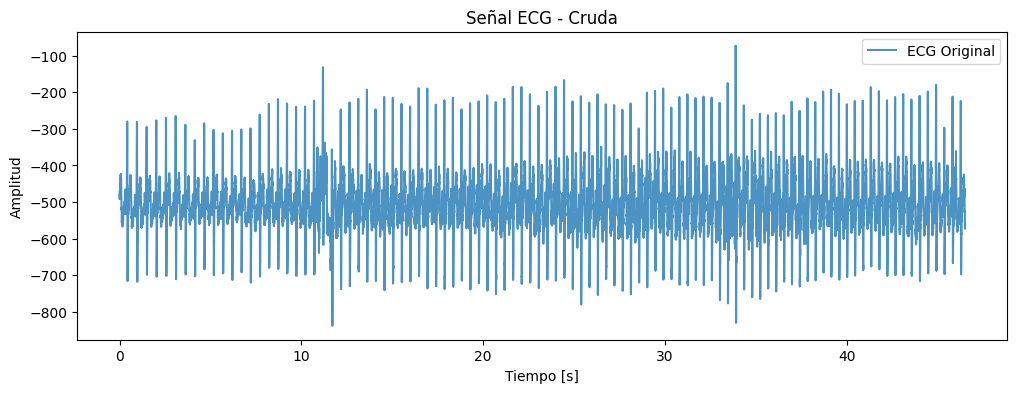

In [131]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="ECG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 5.1238


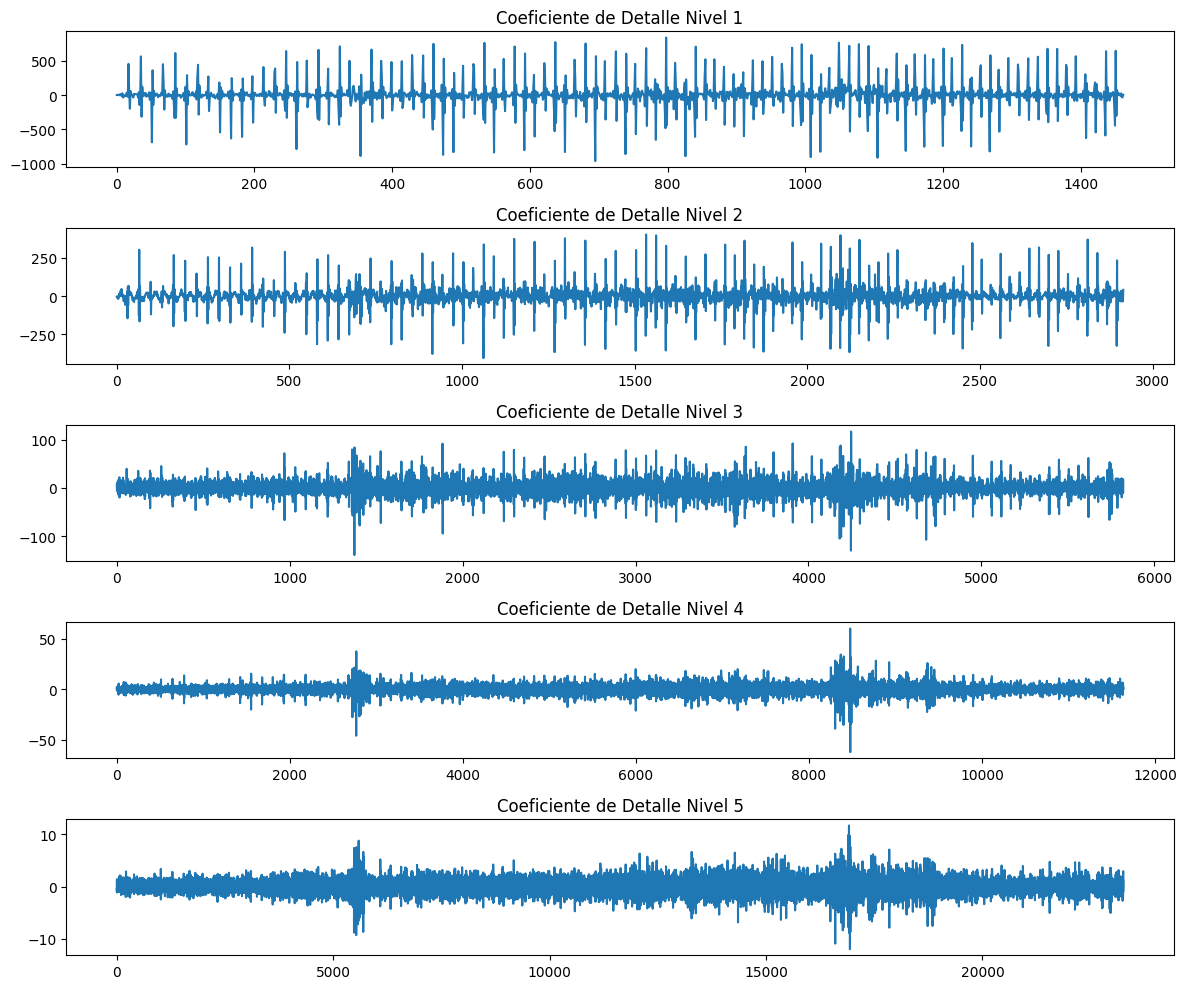

In [132]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

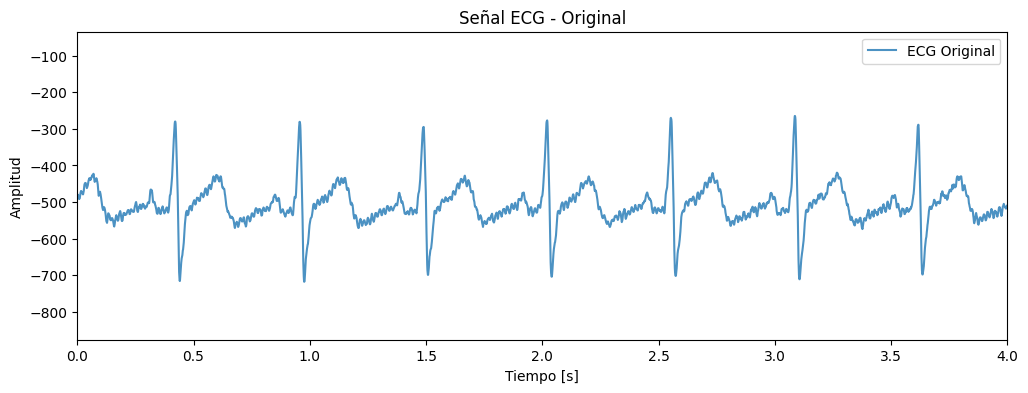

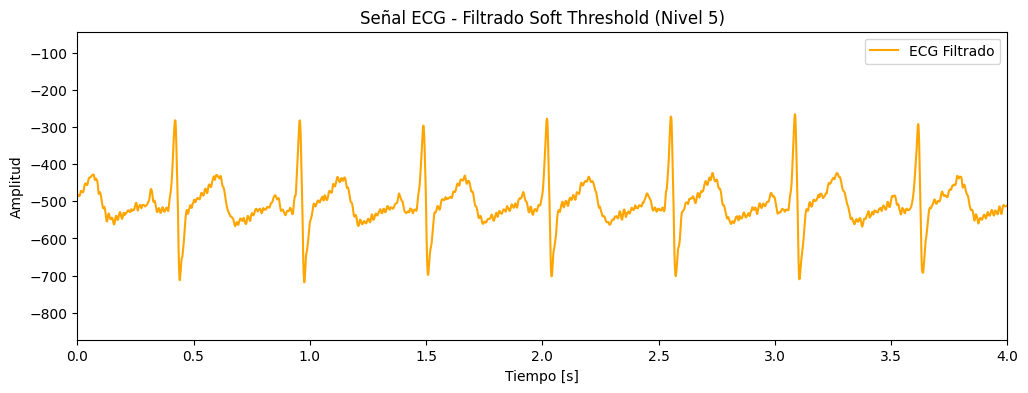

In [133]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="ECG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="ECG Filtrado", color="orange")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal ECG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

## Señal EMG


### Musculo relajado

In [134]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EMG/reposo1_biceps.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

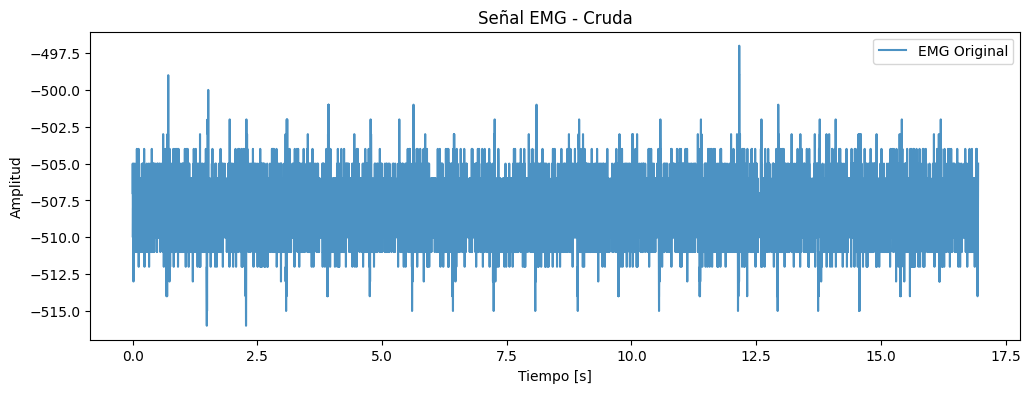

In [135]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EMG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EMG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 4.8504


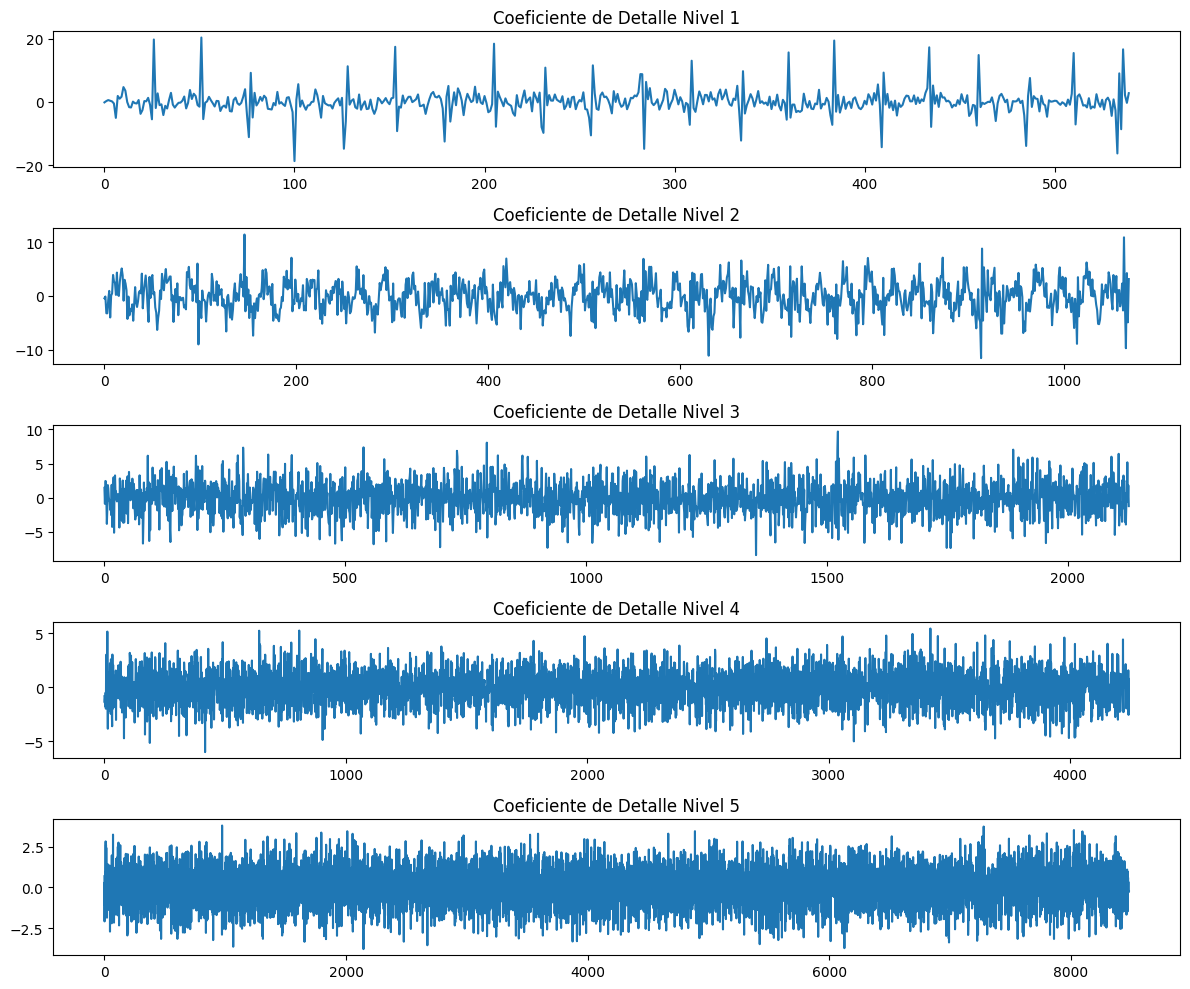

In [136]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

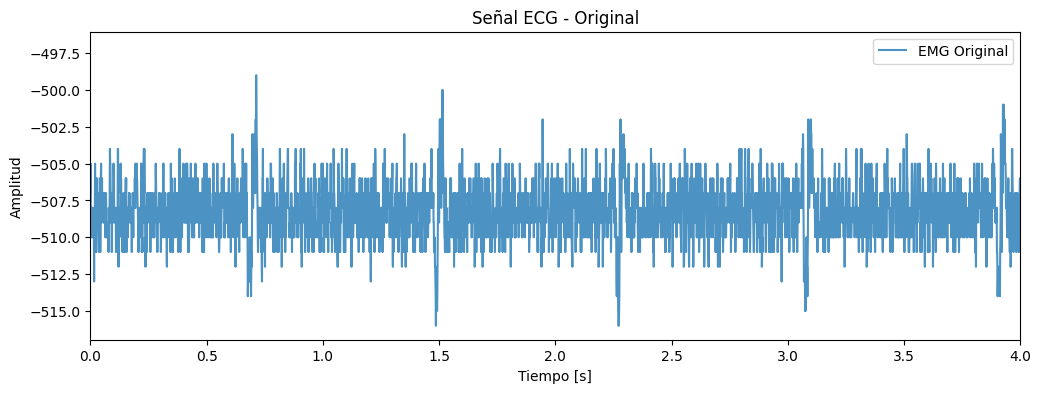

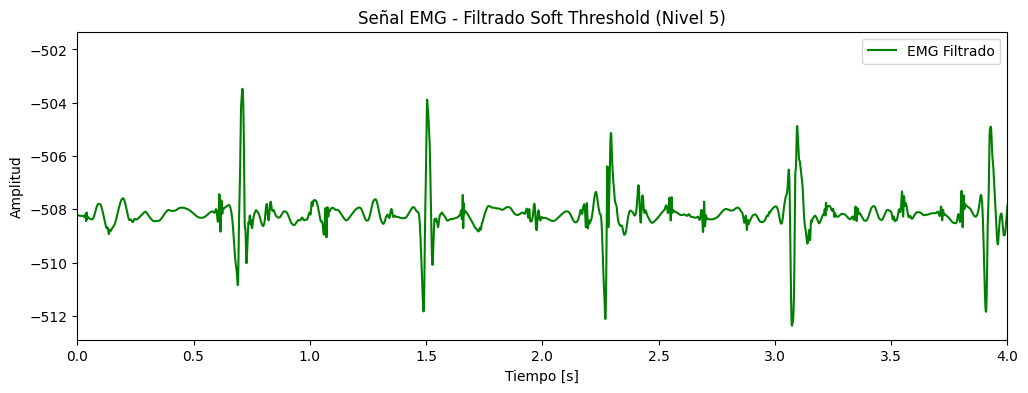

In [137]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EMG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="EMG Filtrado", color="green")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal EMG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

### Movimiento leve

In [138]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EMG/leve1_biceps.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

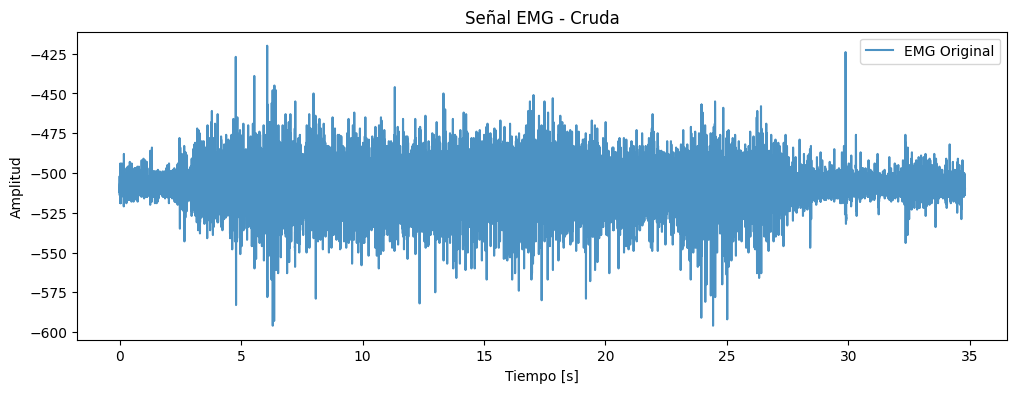

In [139]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EMG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EMG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 11.6313


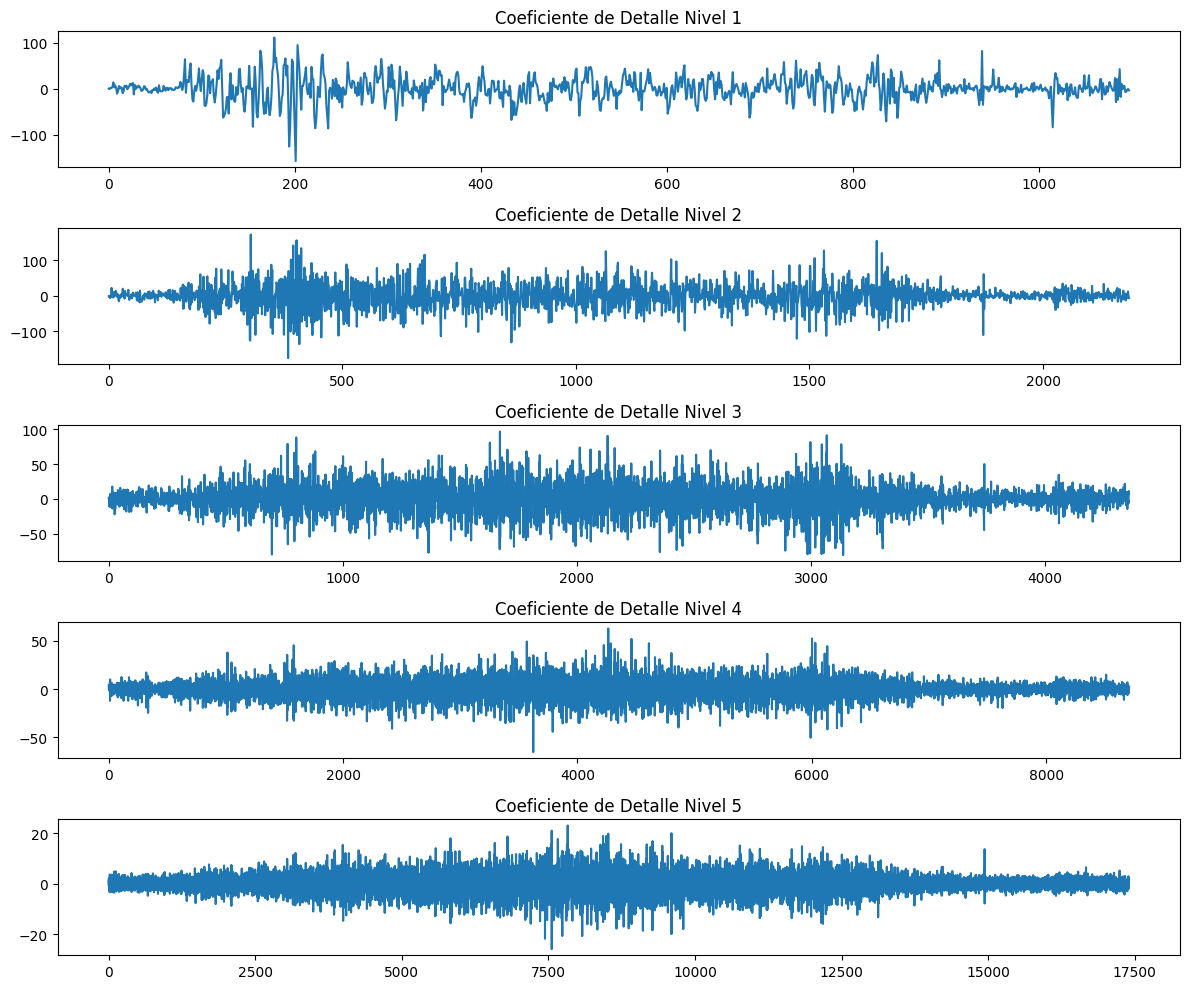

In [140]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

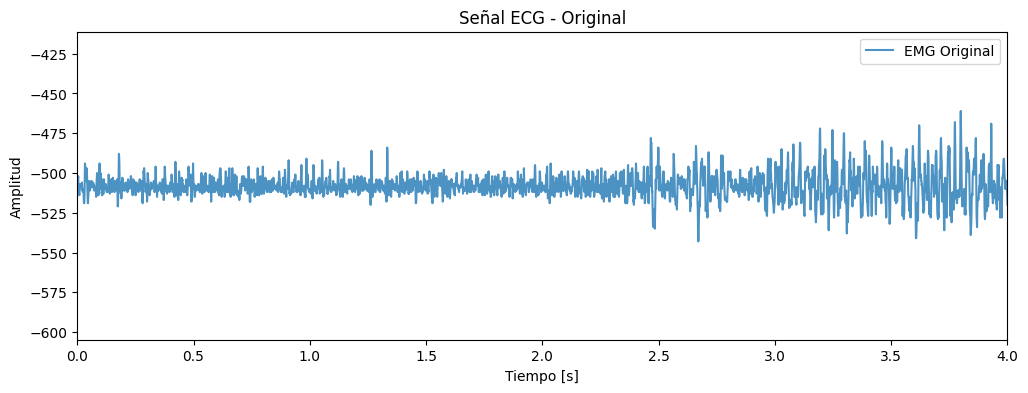

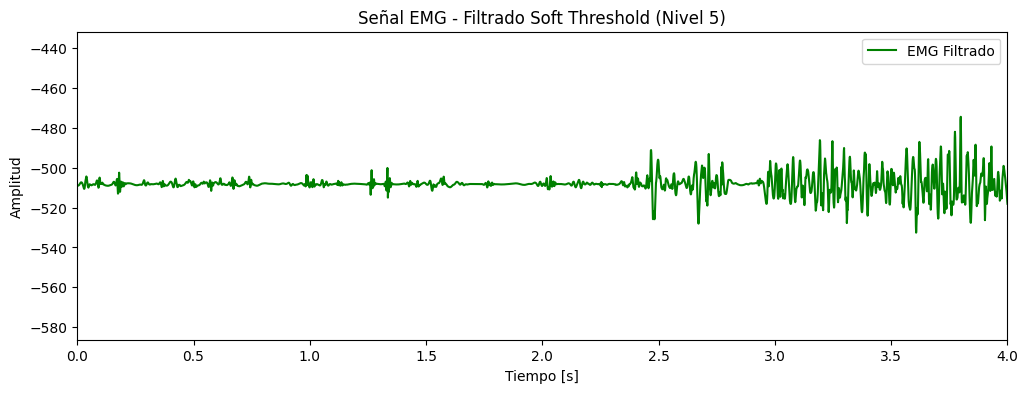

In [141]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EMG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="EMG Filtrado", color="green")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal EMG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

### Aplicando fuerza

In [142]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EMG/fuerza1_biceps.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

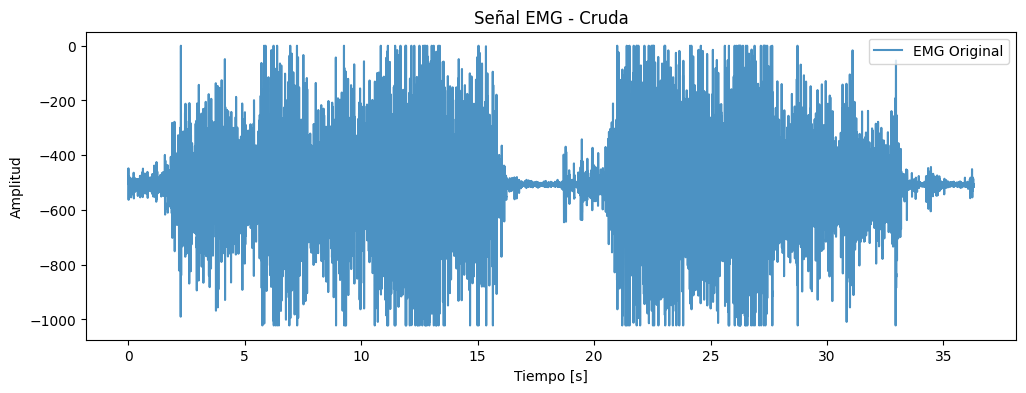

In [143]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EMG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EMG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 58.8541


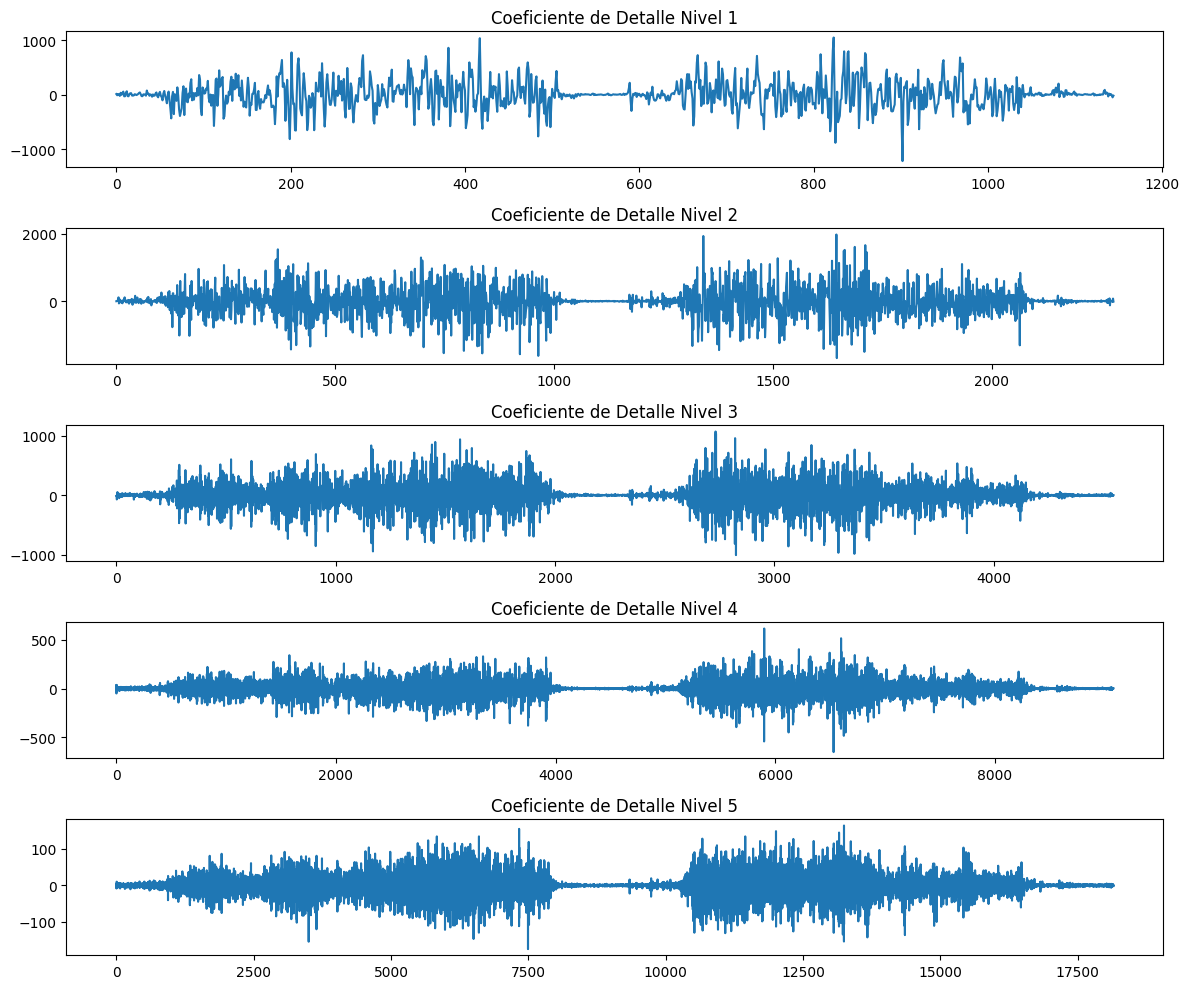

In [144]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

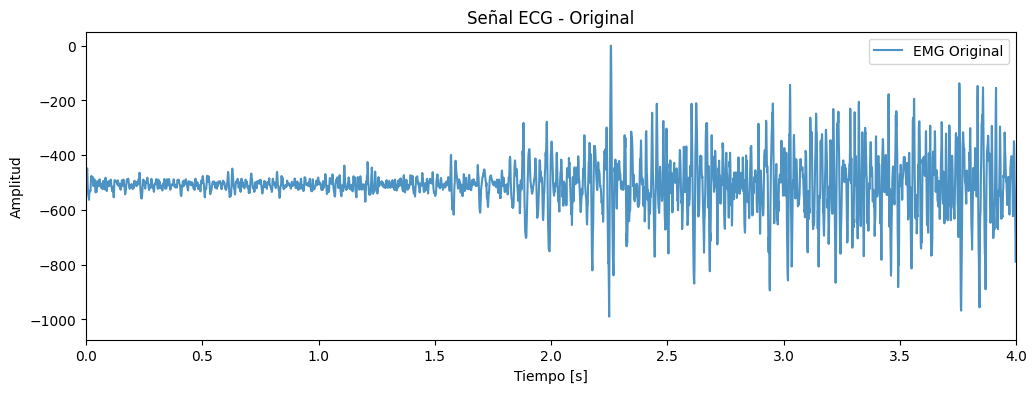

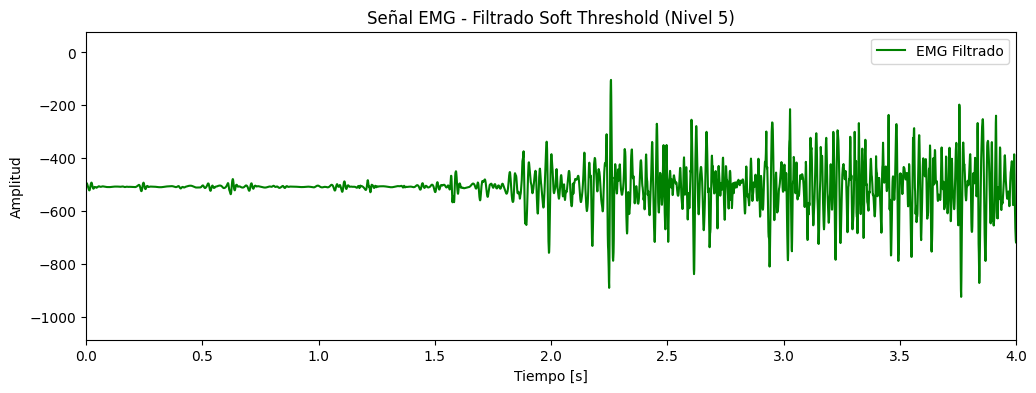

In [145]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EMG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal ECG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="EMG Filtrado", color="green")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal EMG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

## Señal EEG

### Estado basal

In [146]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EEG/Basal.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

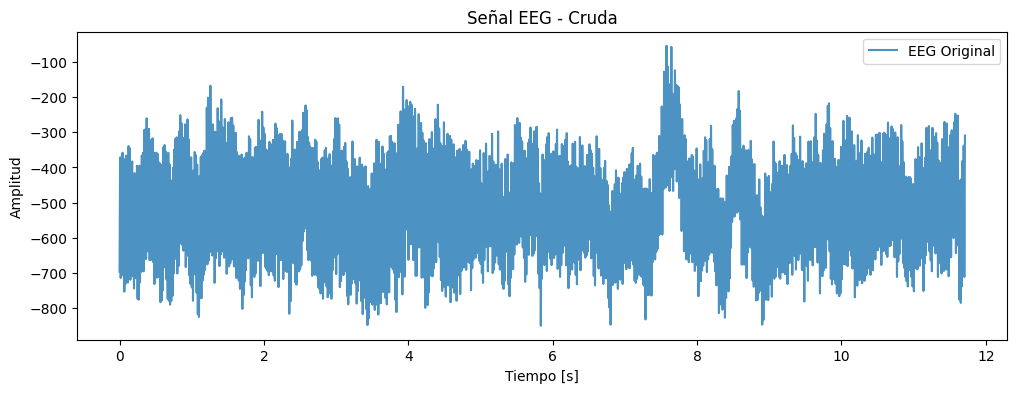

In [147]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EEG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EEG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 8.0863


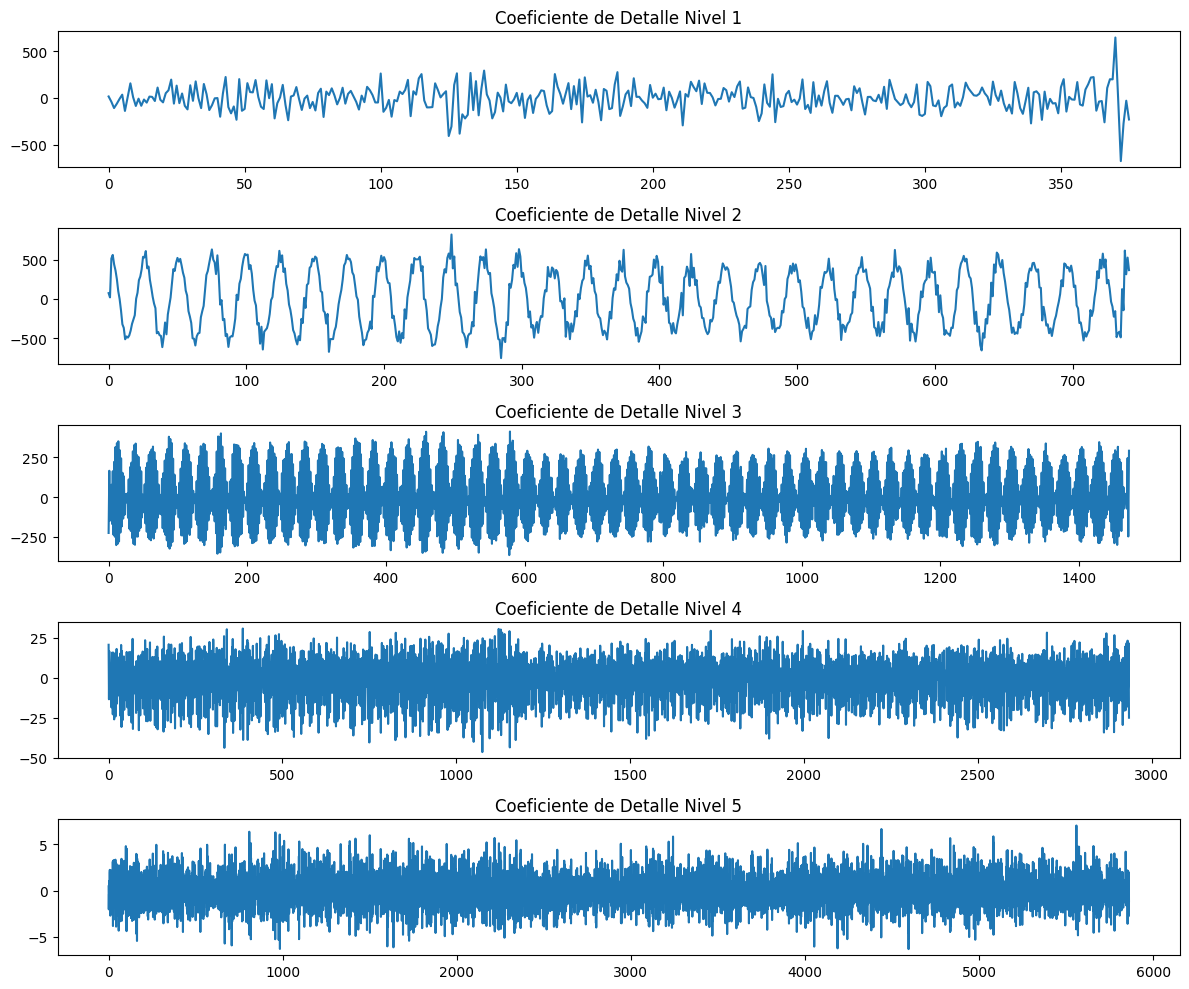

In [148]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

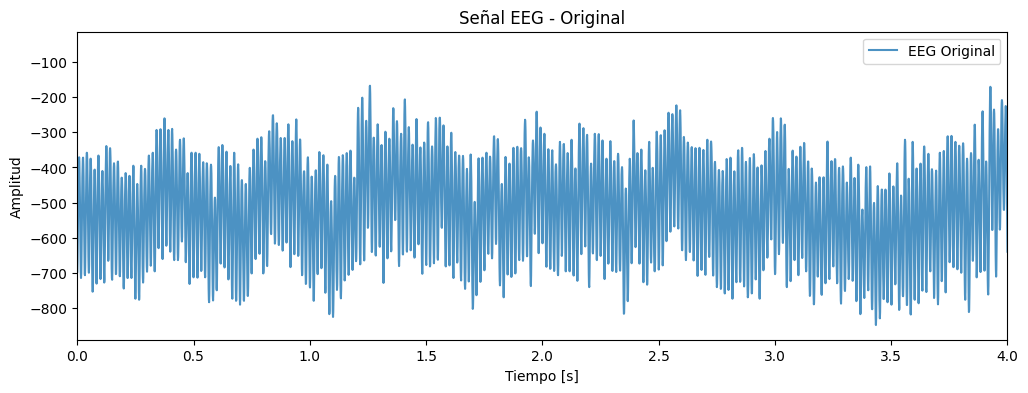

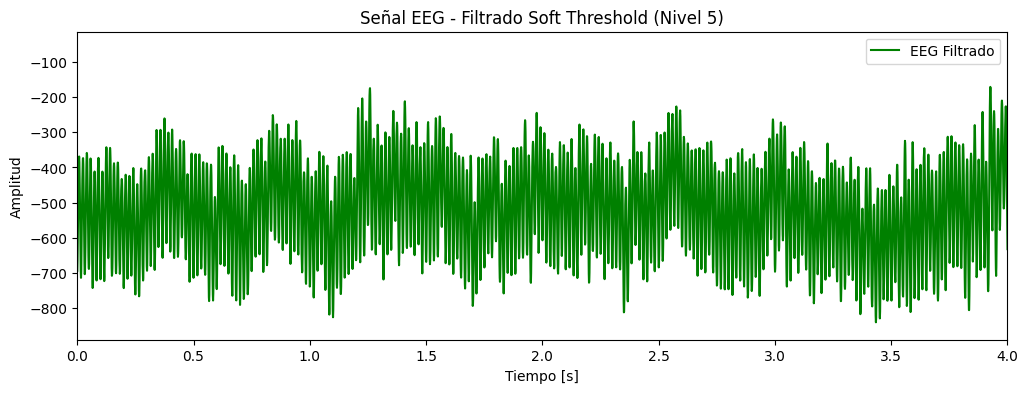

In [149]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

signal_soft = pywt.waverec(coef_soft, wavelet)
signal_soft = signal_soft[:len(signal)]  # recortar al tamaño original

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EEG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EEG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="EEG Filtrado", color="green")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal EEG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

### Mirada fija

In [150]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EEG/Fijar_mirada_2.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

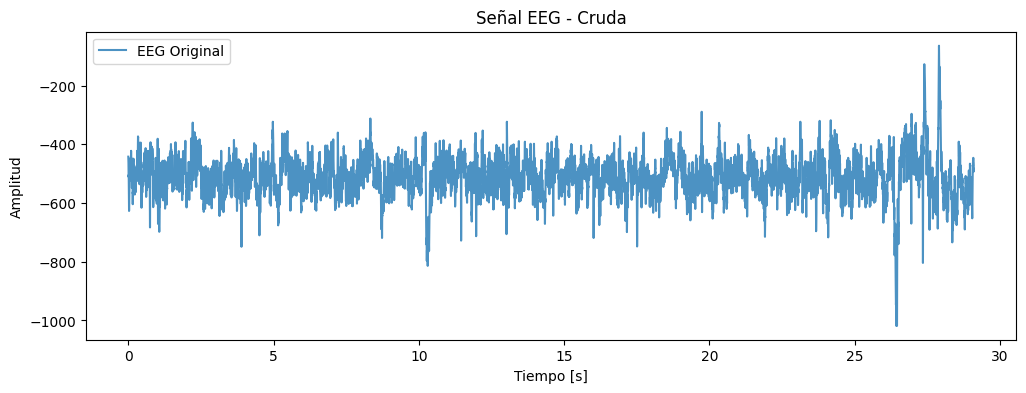

In [151]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EEG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EEG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 6.7657


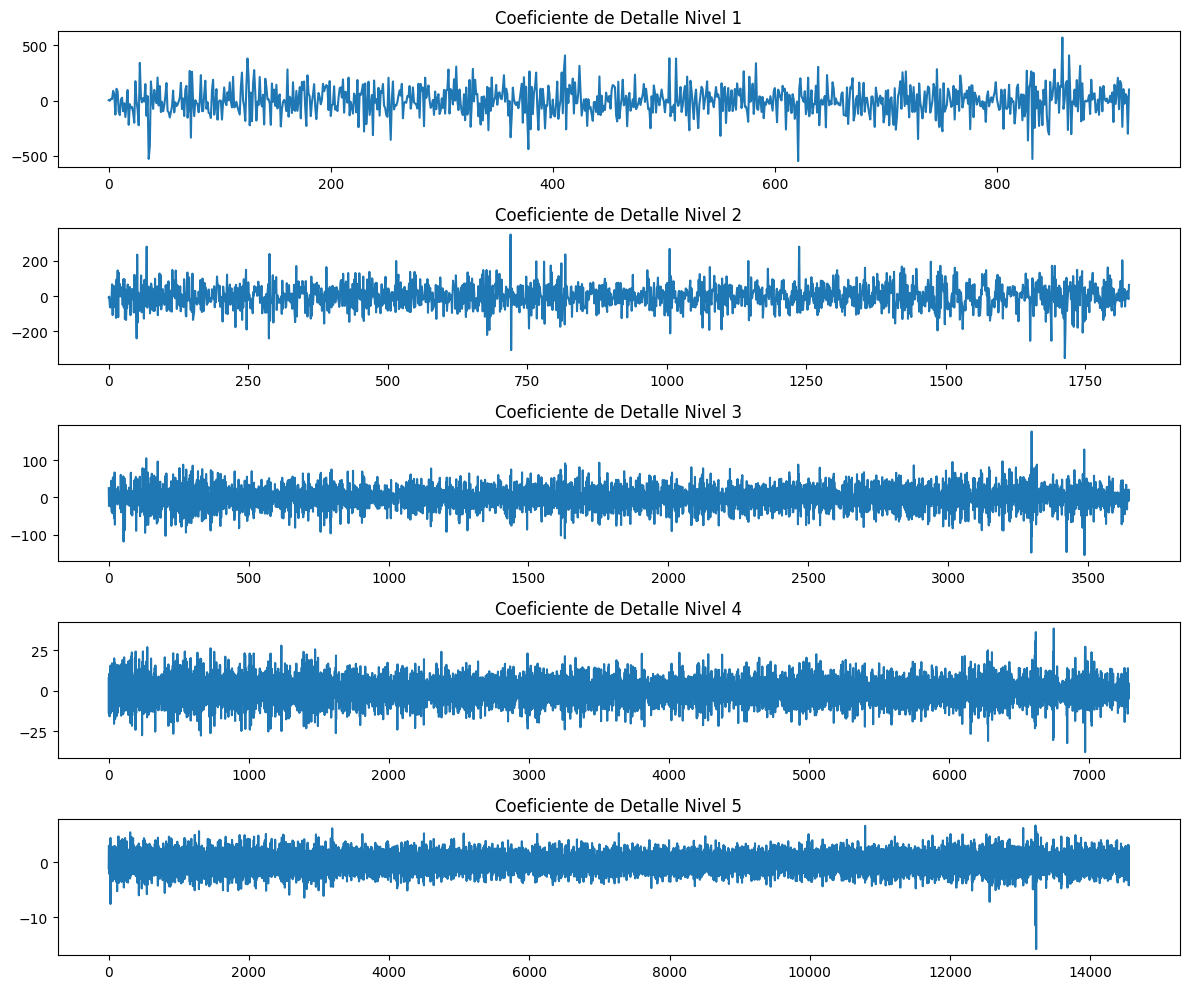

In [152]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

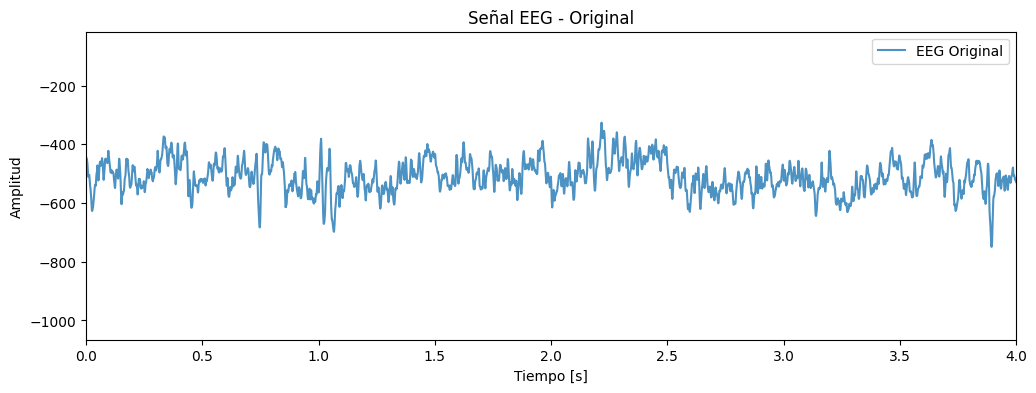

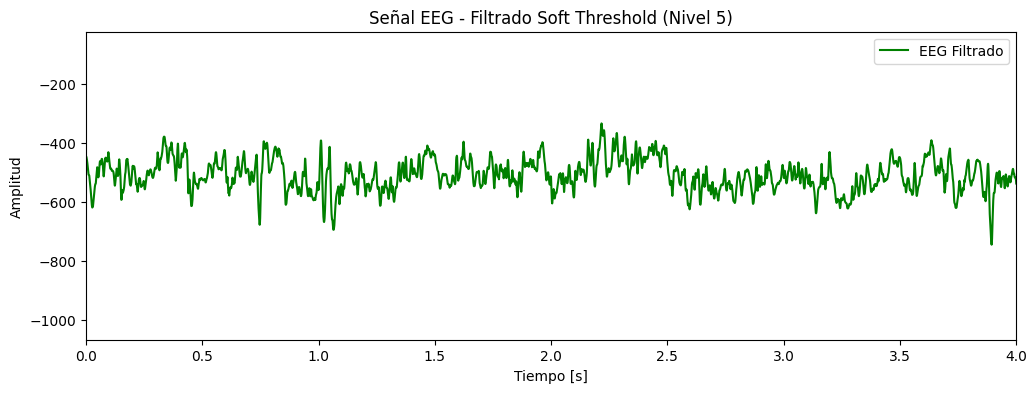

In [153]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

signal_soft = pywt.waverec(coef_soft, wavelet)
signal_soft = signal_soft[:len(signal)]  # recortar al tamaño original

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EEG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EEG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="EEG Filtrado", color="green")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal EEG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()

### Preguntas

In [154]:
#Lectura de datos
ruta= "/Users/miguel_05/Desktop/Programacion/ISB/Laboratorio_7/Señales EEG/preguntas.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

signal = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(signal)) / fs

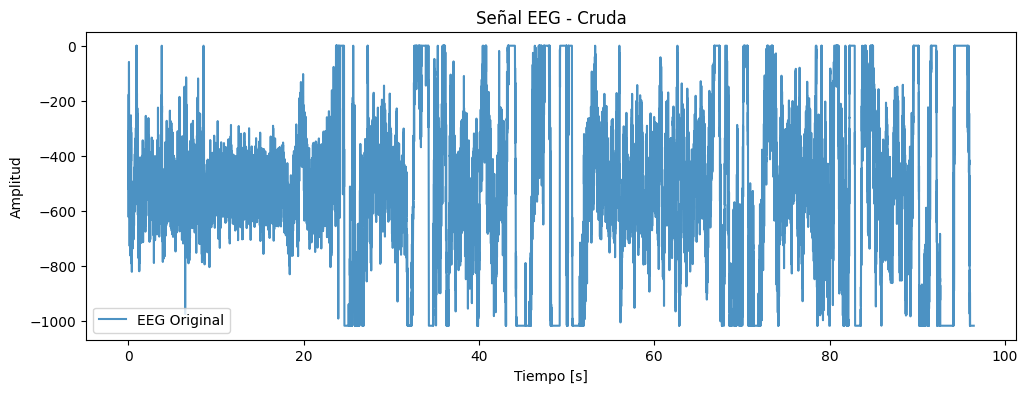

In [155]:
#Visualización de la señal
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EEG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EEG - Cruda")
plt.legend()
plt.show()

Umbral Universal calculado: 7.6110


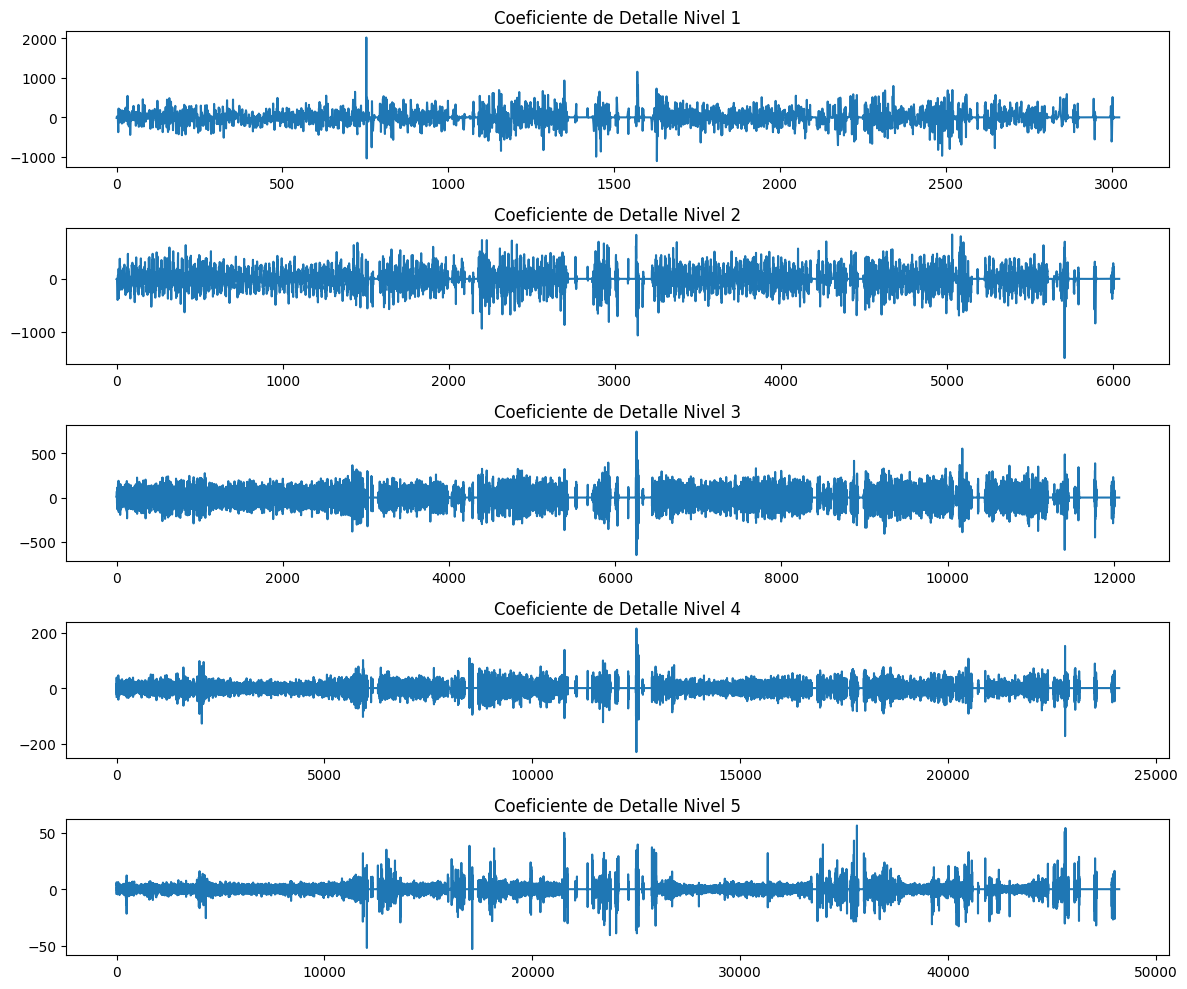

In [156]:
#Elección de familia: Daubechies (db6), adecuada en ECG
wavelet = "db6"
nivel = 5
coeficientes = pywt.wavedec(signal, wavelet, level=nivel)

detalles = coeficientes[1:]  # coef[0] es la aproximación
sigma = np.median(np.abs(detalles[-1])) / 0.6745  # desviación robusta
umbral_universal = sigma * np.sqrt(2 * np.log(len(signal)))

print(f"Umbral Universal calculado: {umbral_universal:.4f}")

# Graficar coeficientes de detalle
plt.figure(figsize=(12, 10))
for i, d in enumerate(detalles, 1):
    plt.subplot(len(detalles), 1, i)
    plt.plot(d)
    plt.title(f"Coeficiente de Detalle Nivel {i}")
plt.tight_layout()
plt.show()

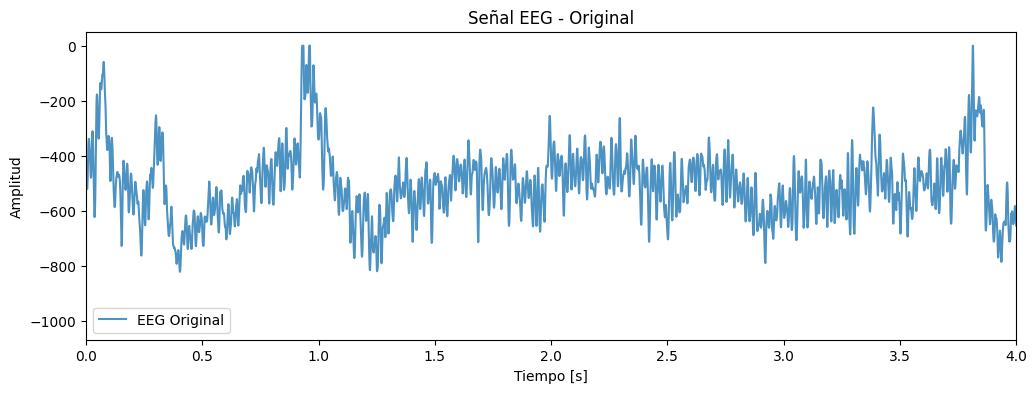

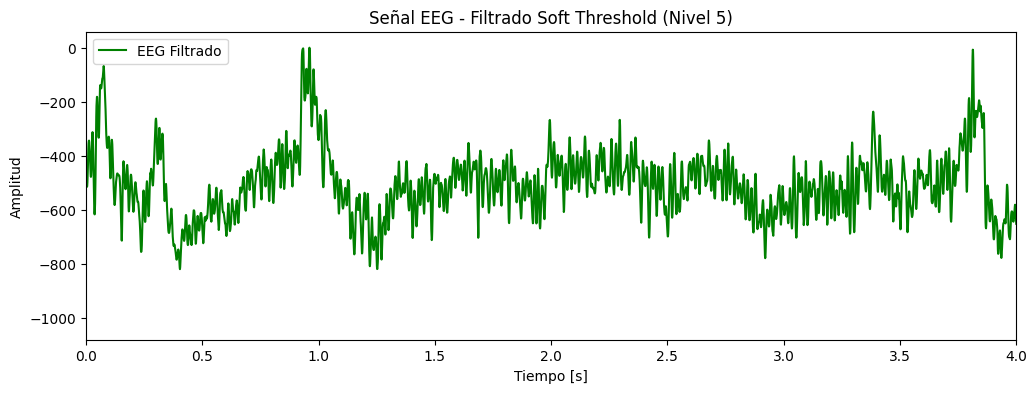

In [157]:
# Nivel óptimo (último nivel de descomposición)
nivel_optimo = nivel

# Filtrado y reconstrucción de la señal con wavelets 
coef_soft = [coeficientes[0]]  # conservar aproximación
for i, d in enumerate(detalles, 1):
    if i <= nivel_optimo:
        coef_soft.append(pywt.threshold(d, umbral_universal, mode='soft'))
    else:
        coef_soft.append(d)
signal_soft = pywt.waverec(coef_soft, wavelet)

signal_soft = pywt.waverec(coef_soft, wavelet)
signal_soft = signal_soft[:len(signal)]  # recortar al tamaño original

# Visualización de resultados

# Original
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal, label="EEG Original", alpha=0.8)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal EEG - Original")
plt.xlim(0, 4)
plt.legend()
plt.show()

# Señal filtrada
plt.figure(figsize=(12, 4))
plt.plot(tiempo, signal_soft, label="EEG Filtrado", color="green")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal EEG - Filtrado Soft Threshold (Nivel {nivel_optimo})")
plt.xlim(0, 4)
plt.legend()
plt.show()